<a href="https://colab.research.google.com/github/RedEgnival/sem-4/blob/main/I069_SIP_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rusheel Sharma
# I069
# SIP Lab 5


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Histogram with cv2 without using in-built functions

In [ ]:
def hist(img):
  count = []
  r = []
  for k in range(0,256):
    r.append(k)
    count1=0
    for i in range(m):
      for j in range(n):
        if img[i,j] == k:
          count1 += 1
    count.append(count1)
  return r,count


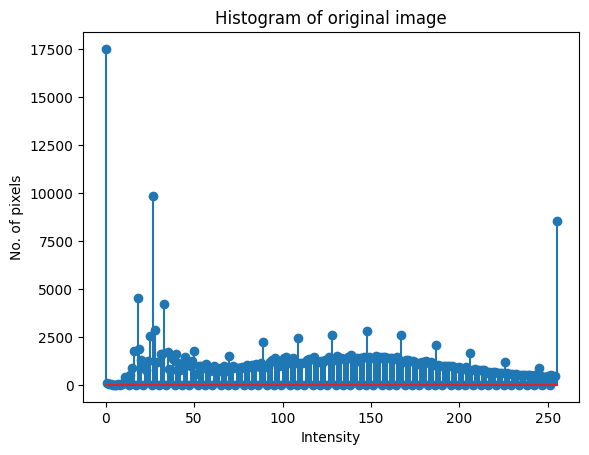

In [ ]:
img = cv2.imread("/content/Fig0316(3)(third_from_top).tif",0)
m,n = img.shape
r1,count1 = hist(img)
plt.stem(r1,count1)
plt.xlabel("Intensity")
plt.ylabel("No. of pixels")
plt.title("Histogram of original image")
plt.show()

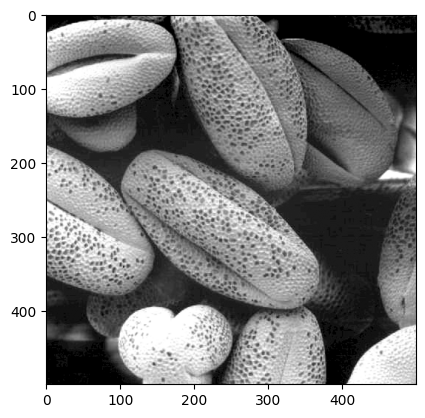

In [ ]:
plt.imshow(img,cmap="gray")

Histogram equalization

In [ ]:
def histnew(imgo):
  r = np.arange(0,256, dtype = int)
  count = np.zeros(len(r), dtype = int)
  for k in r:
    count[k] = (imgo == k).sum()
  return (r,count)

In [ ]:
img1 = cv2.imread("/content/Fig0316(1)(top_left).tif",0)
m1,n1 = img1.shape
r2,count2 = histnew(img1)

In [ ]:
print(m1,n1)

500 500


In [ ]:
df = pd.DataFrame({"Intensity":r2,"No. of pixels":count2})
df

,Intensity,No. of pixels
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
251,251,0
252,252,0
253,253,4007
254,254,0


In [ ]:
pdf = count2/(m1*n1)
pdf1 = pdf.copy()
cdf = np.array (np.zeros(len(pdf)))
cdf[0] = pdf[0]
for i in range(1,256):
  cdf[i] = cdf[i-1] + pdf[i]

sk = cdf*255
sk = sk.astype(int)

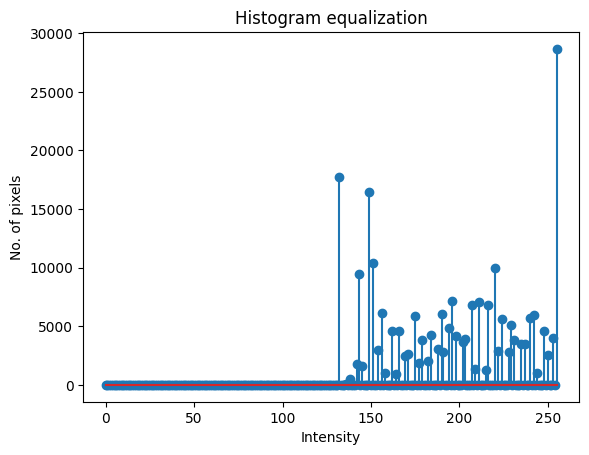

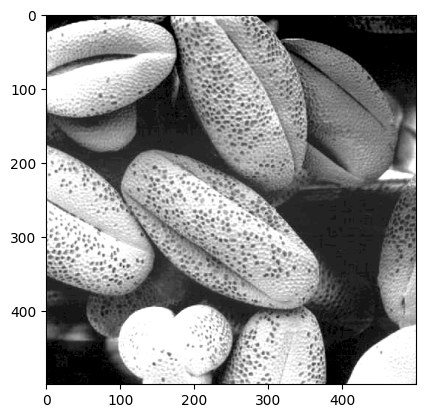

In [ ]:
plt.stem(r2,count2)
plt.xlabel("Intensity")
plt.ylabel("No. of pixels")
plt.title("Histogram equalization")
plt.show()
plt.imshow(img1,cmap="gray")

In [ ]:
df["pdf"] = pdf1
df["cdf"] = cdf
df["sk"] = sk
df.tail(10)

,Intensity,No. of pixels,pdf,cdf,sk
246,246,0,0.000000,0.840756,214
247,247,0,0.000000,0.840756,214
248,248,4599,0.018396,0.859152,219
249,249,0,0.000000,0.859152,219
250,250,2546,0.010184,0.869336,221
251,251,0,0.000000,0.869336,221
252,252,0,0.000000,0.869336,221
253,253,4007,0.016028,0.885364,225
254,254,0,0.000000,0.885364,225
255,255,28659,0.114636,1.000000,255


In [ ]:
imgequ = np.zeros((m1,n1), dtype = int)
for i in range(m1):
  for j in range(n1):
    temp = img1[i,j]
    imgequ[i,j] = sk[temp]
imgequ = imgequ.astype("int")

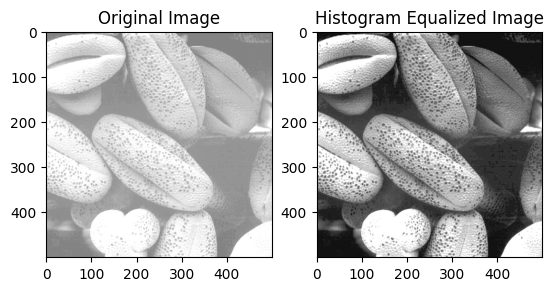

In [ ]:
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img1,cmap="gray", vmin = 0, vmax = 255)
plt.subplot(1,2,2)
plt.title("Histogram Equalized Image")
plt.imshow(imgequ,cmap="gray", vmin = 0, vmax = 255)